In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.plotly as py
#import plotly.graph_objs as go

#py.offline.init_notebook_mode(connected=True)

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/zomato.csv (1).zip')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
data=data[data.cuisines.isna()==False]

In [ ]:
data.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7741
votes,0
phone,1179
location,0
rest_type,206


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51672 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51672 non-null  object
 1   address                      51672 non-null  object
 2   name                         51672 non-null  object
 3   online_order                 51672 non-null  object
 4   book_table                   51672 non-null  object
 5   rate                         43931 non-null  object
 6   votes                        51672 non-null  int64 
 7   phone                        50493 non-null  object
 8   location                     51672 non-null  object
 9   rest_type                    51466 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51352 non-null  object
 13  reviews_list                 51672 n

In [ ]:
data.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

In [ ]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [ ]:
data.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)

In [ ]:
data.name.value_counts().head()

,count
name,
Cafe Coffee Day,96
Onesta,85
Just Bake,73
Empire Restaurant,71
Five Star Chicken,70


**DATA VISULALIZATION**

Text(0.5, 1.0, 'Name vs Number of Restaurant')

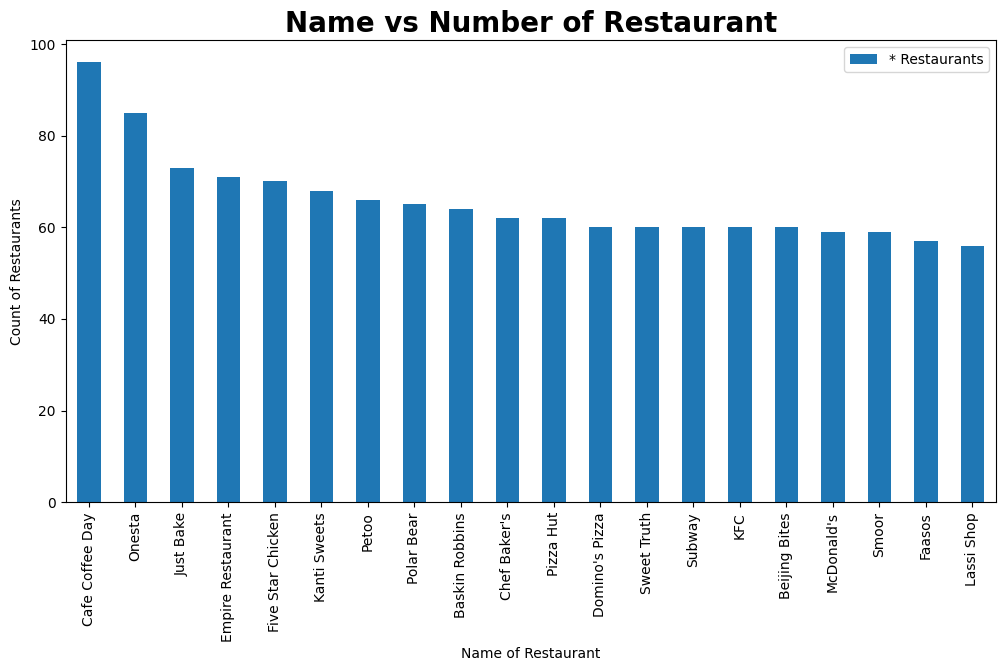

In [ ]:
plt.figure(figsize = (12,6))
ax = data.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

In [ ]:
data.online_order.value_counts()

,count
online_order,
Yes,30428
No,21244


Text(0.5, 0, 'online orders')

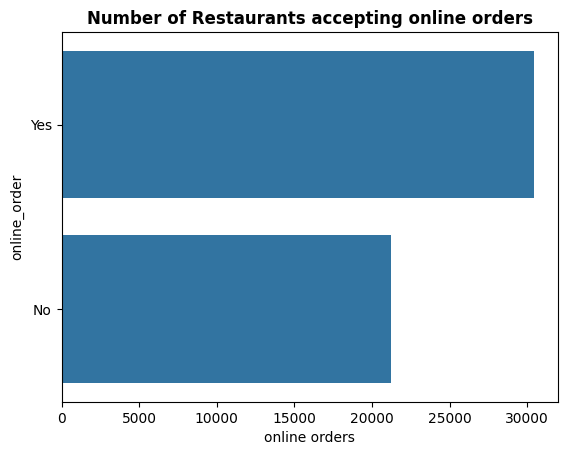

In [ ]:
ax= sns.countplot(data['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

In [ ]:
data['book_table'].value_counts()

,count
book_table,
No,45223
Yes,6449


Text(0, 0.5, 'No of restaurants')

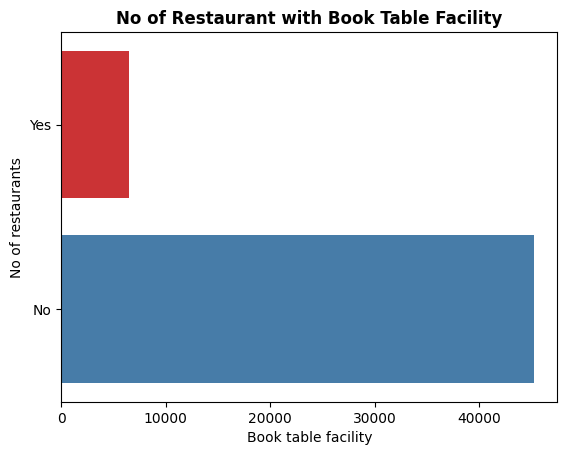

In [ ]:
sns.countplot(data['book_table'], palette= "Set1")
plt.title("No of Restaurant with Book Table Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')

In [ ]:
data['location'].value_counts()[:10]

,count
location,
BTM,5124
HSR,2523
Koramangala 5th Block,2504
JP Nagar,2233
Whitefield,2136
Indiranagar,2081
Jayanagar,1926
Marathahalli,1843
Bannerghatta Road,1630


Text(0.5, 1.0, 'Location')

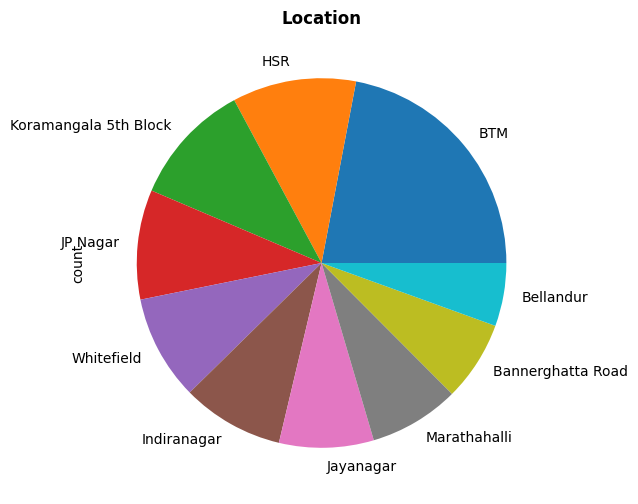

In [ ]:
plt.figure(figsize=(12,6))
data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

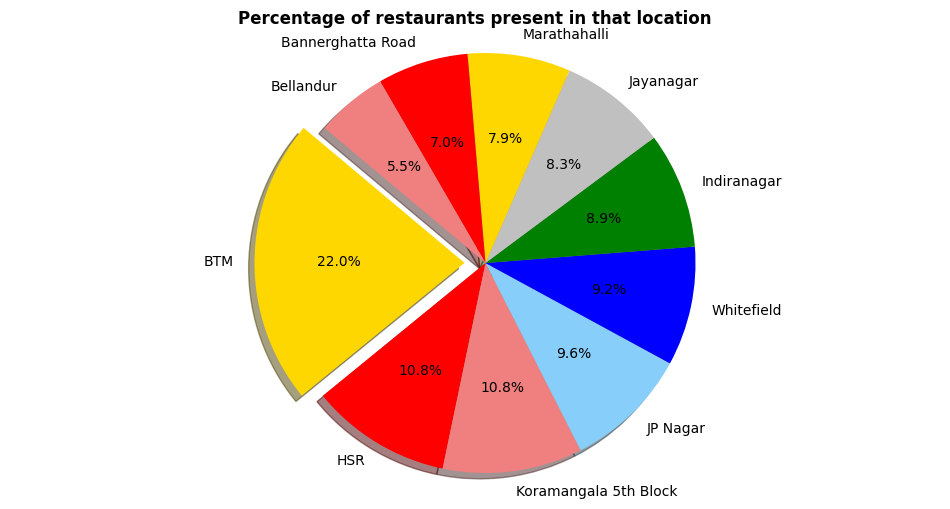

In [ ]:
plt.figure(figsize = (12,6))
names = data['location'].value_counts()[:10].index
values = data['location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Location vs Count')

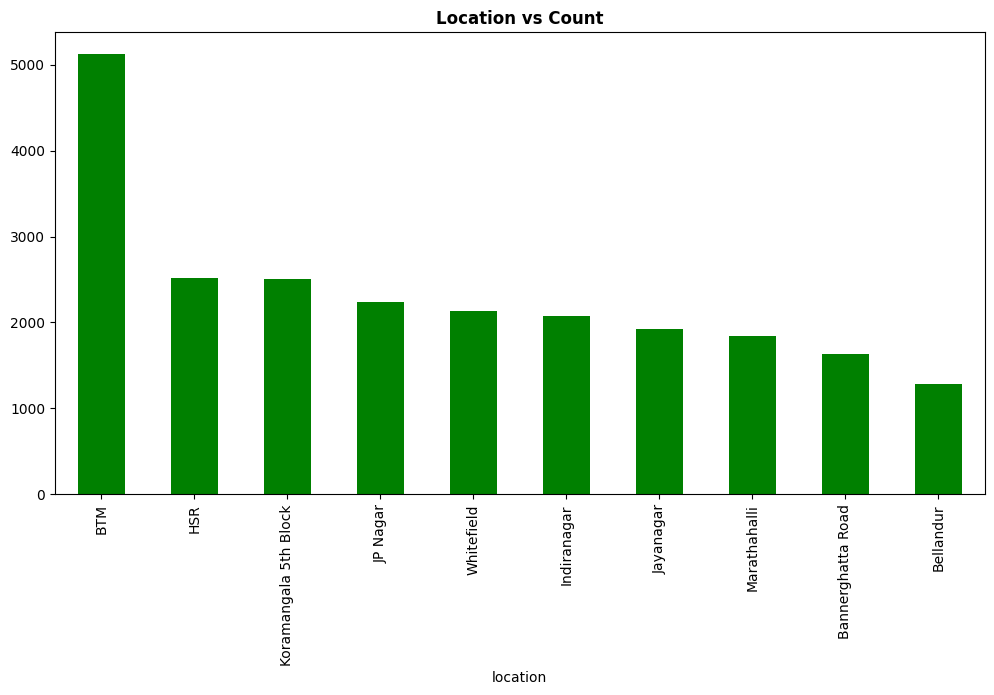

In [ ]:
plt.figure(figsize = (12,6))
data['location'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

In [ ]:
data['location'].nunique()

93

In [ ]:
data['rest_type'].value_counts().head(10)

,count
rest_type,
Quick Bites,19129
Casual Dining,10326
Cafe,3732
Delivery,2595
Dessert Parlor,2262
"Takeaway, Delivery",2035
"Casual Dining, Bar",1154
Bakery,1141
Beverage Shop,865


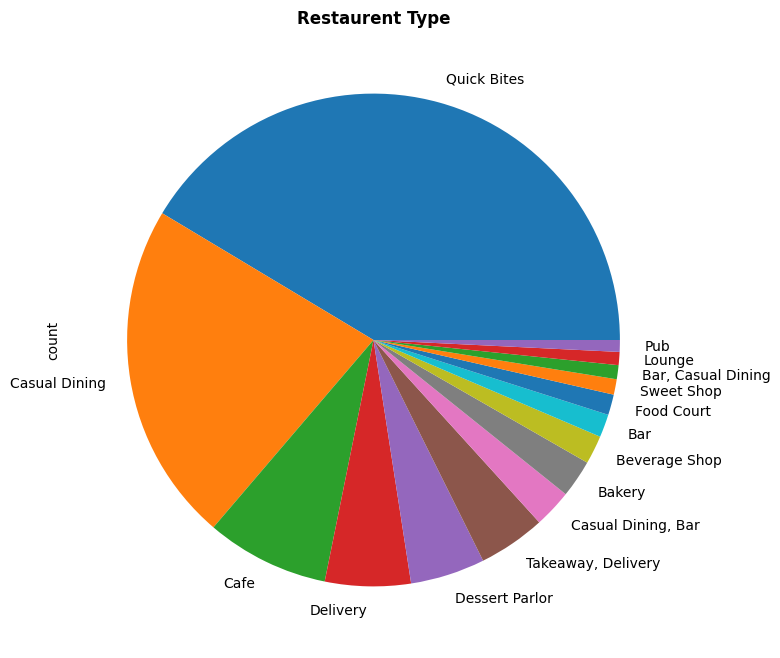

In [ ]:
plt.figure(figsize = (14,8))
data.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [ ]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

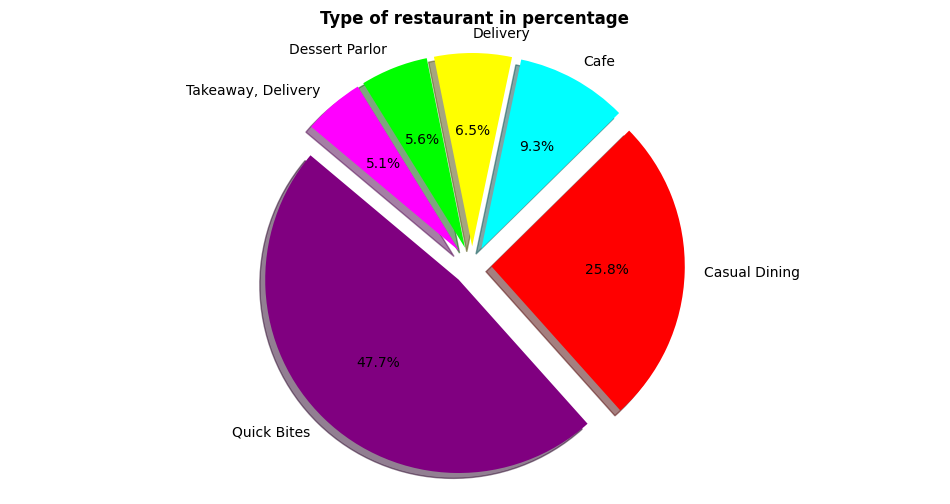

In [ ]:
plt.figure(figsize = (12,6))
names = data['rest_type'].value_counts()[:6].index
values = data['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
data['average_cost'].value_counts()[:20]

,count
average_cost,
300,7576
400,6554
500,4977
200,4855
600,3712
250,2959
800,2285
150,2064
700,1948


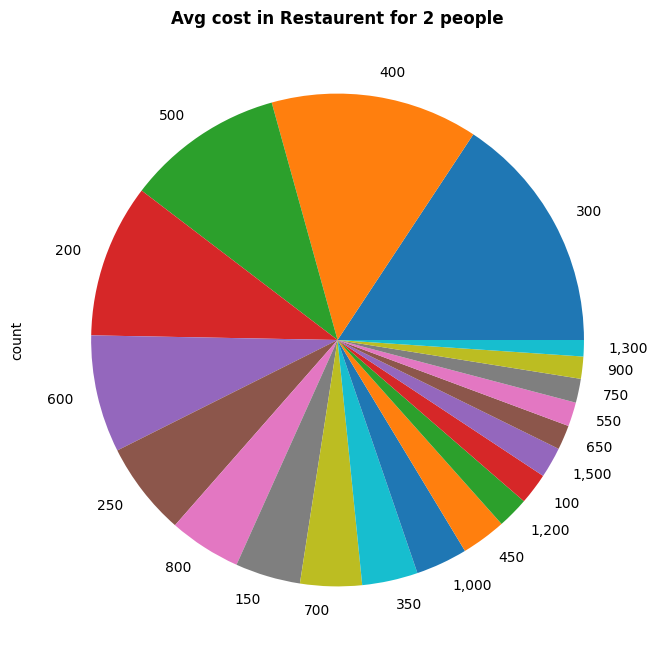

In [ ]:
plt.figure(figsize = (12,8))
data['average_cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [ ]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

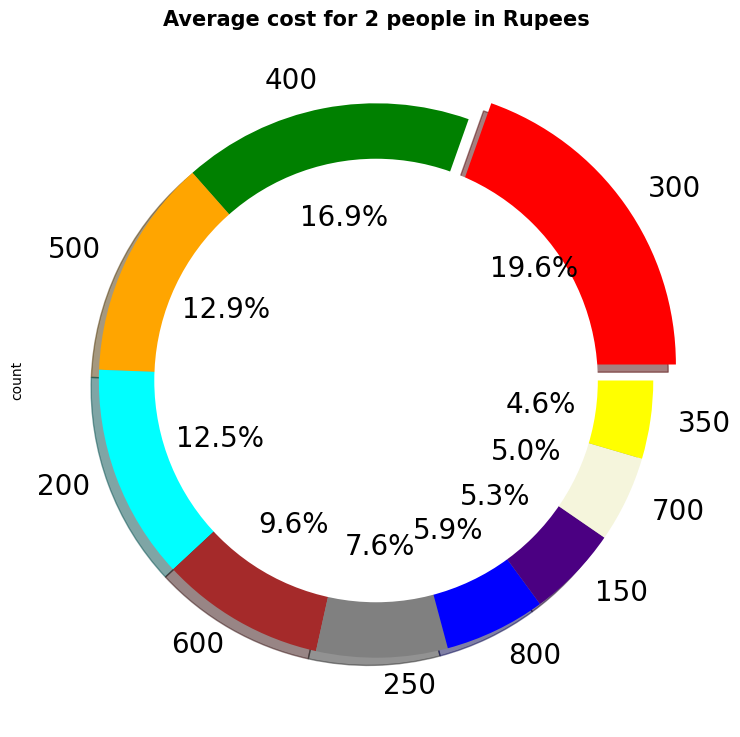

In [ ]:
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

delplot = data['average_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

In [ ]:
dishes_data = data[data.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [ ]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0, 0.5, 'Count')

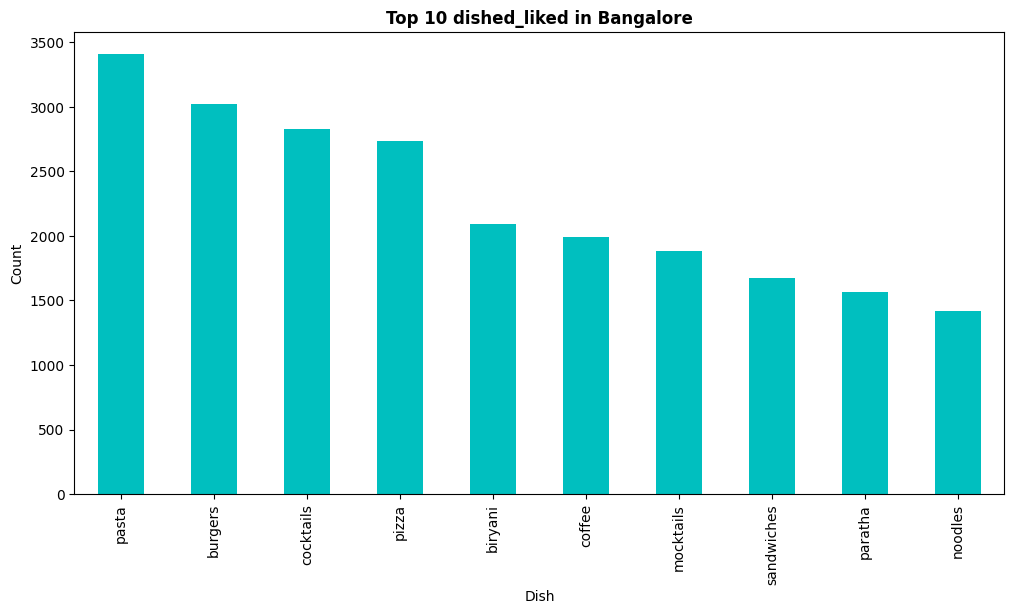

In [ ]:
plt.figure(figsize=(12,6))
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

In [ ]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [ ]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

3.9058343007008034


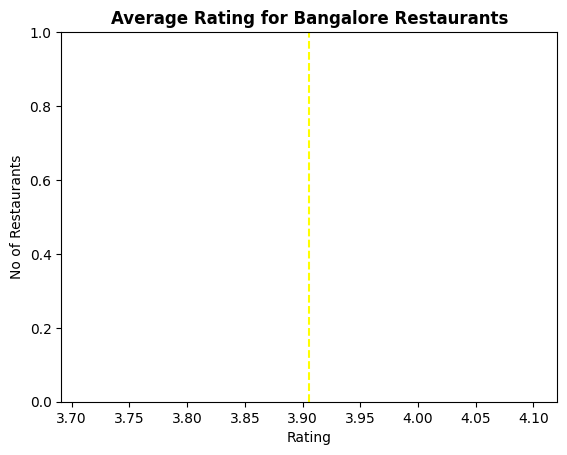

In [ ]:
plt.axvline(x= data.rate.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.rate.mean())

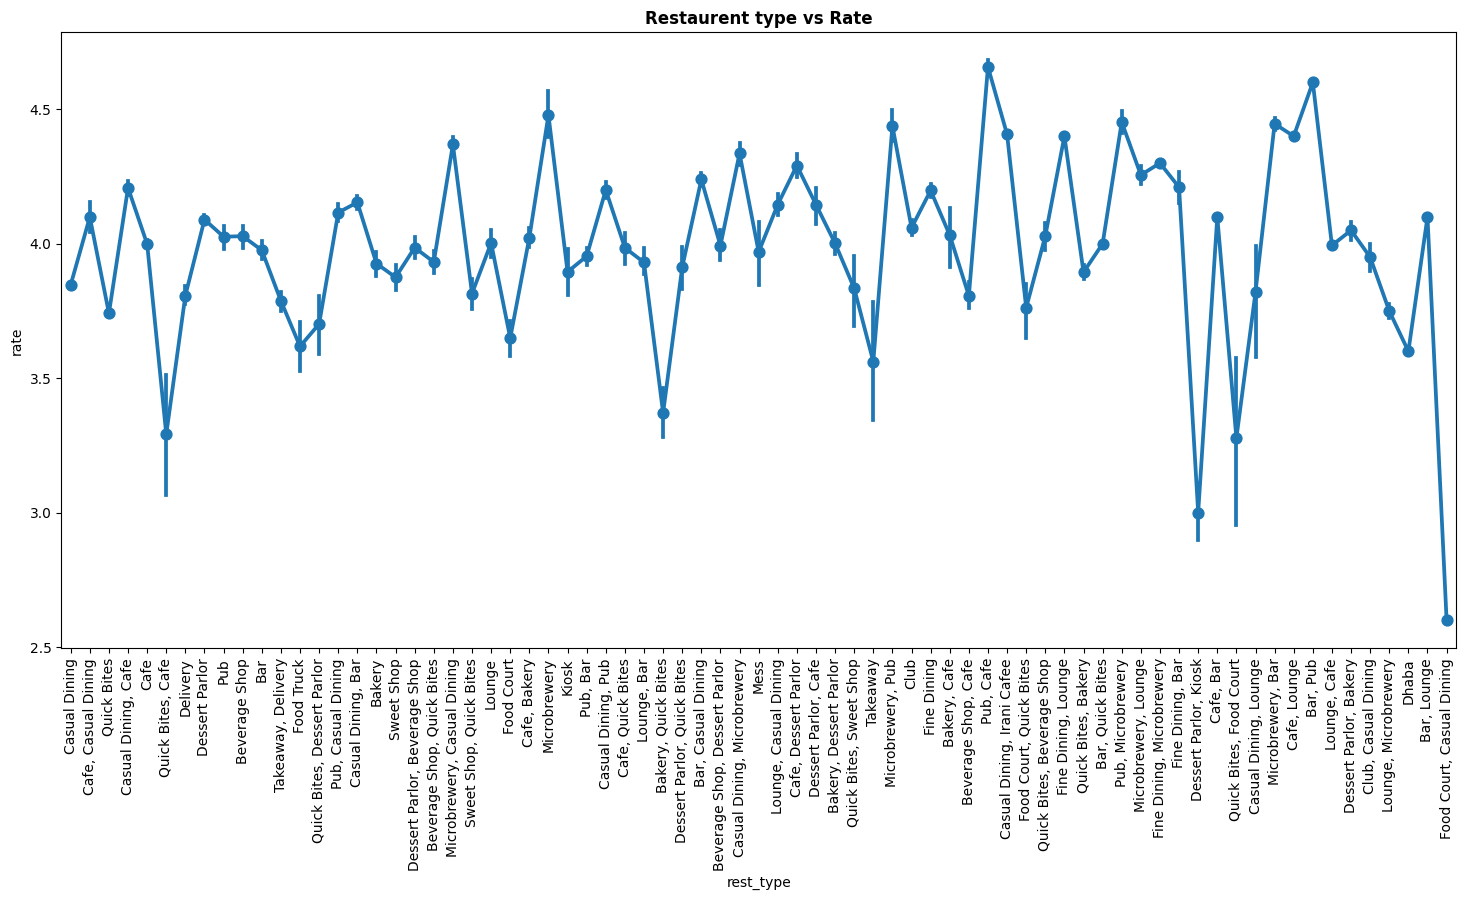

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

In [ ]:
#lets delete the nulll values
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [ ]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

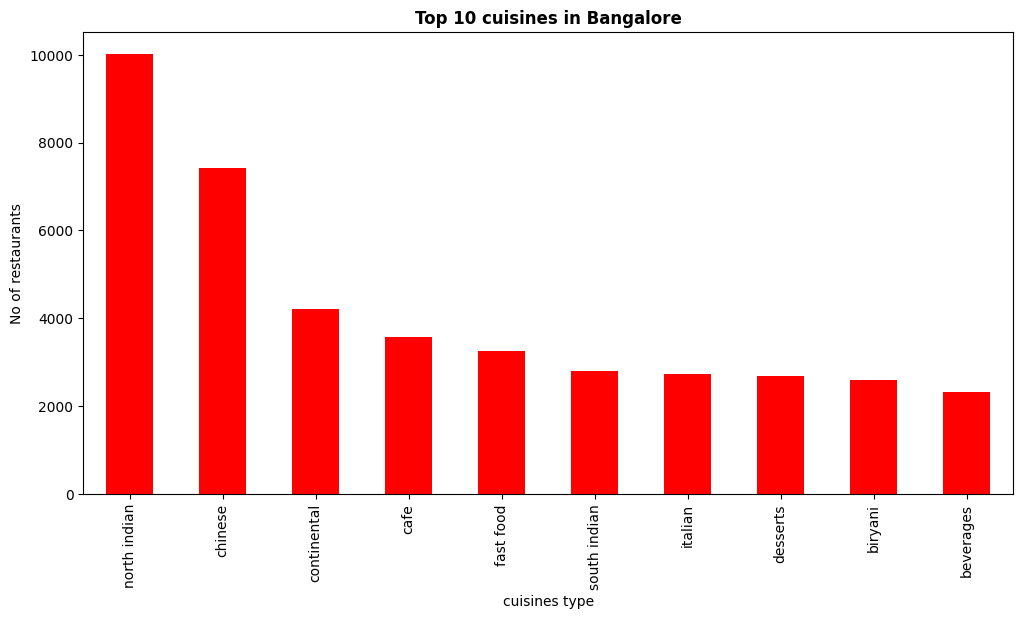

In [ ]:
plt.figure(figsize=(12,6))
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

Text(0.5, 1.0, 'rate vs oline order')

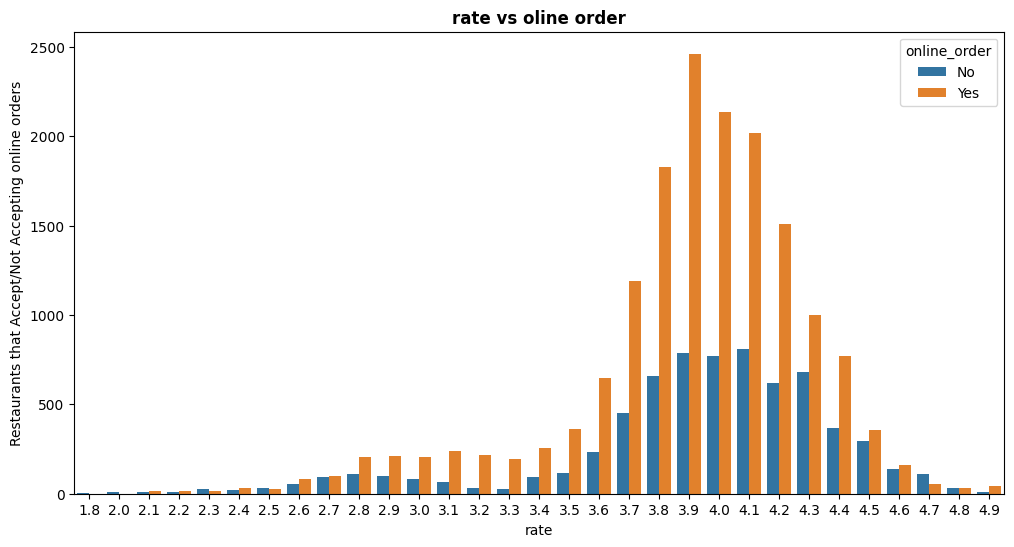

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [ ]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,True,True,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,False,False,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars
51708,Keys Cafe - Keys Hotel,False,False,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars
51711,Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars


In [ ]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_type'], inplace  =True)

In [ ]:
data['rest_type'] = data['rest_type'].str.replace(',' , '')
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

,count
rest_type,
Casual Dining,7331
Bites Quick,5253
Cafe,2375
Bar Casual Dining,1321
Dessert Parlor,1083


In [ ]:
data['cuisines'] = data['cuisines'].str.replace(',' , '')
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

,count
cuisines,
Indian North,1152
Chinese Indian North,852
Chinese Indian Indian North South,455
Indian South,366
Cream Desserts Ice,334


In [ ]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

In [ ]:
data["average_cost"] = data["average_cost"].str.replace(',' , '')

In [ ]:
data["average_cost"] = data["average_cost"].astype('float')

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,True,True,4.1,775,1,29,951,800.0
1,Spice Elephant,True,False,4.1,787,1,29,963,800.0
2,San Churro Cafe,True,False,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,False,False,3.7,88,1,19,1201,300.0
4,Grand Village,False,False,3.8,166,4,29,1237,600.0


In [ ]:
x = data.drop(['rate','name'],axis = 1)

In [ ]:
y = data['rate']

In [ ]:
x.shape

(23259, 7)

In [ ]:
y.shape

(23259,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23259 entries, 0 to 51715
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23259 non-null  object 
 1   online_order  23259 non-null  bool   
 2   book_table    23259 non-null  bool   
 3   rate          23259 non-null  float64
 4   votes         23259 non-null  int64  
 5   location      23259 non-null  int64  
 6   rest_type     23259 non-null  int64  
 7   cuisines      23259 non-null  int64  
 8   average_cost  23259 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(1)
memory usage: 1.5+ MB


In [ ]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,True,True,0.455722,0.152328,-1.484286,0.439629,0.511472,0.089176
1,Spice Elephant,True,False,0.455722,0.163105,-1.484286,0.439629,0.544855,0.089176
2,San Churro Cafe,True,False,-0.248401,0.280757,-1.484286,-0.260339,0.108097,0.089176
3,Addhuri Udupi Bhojana,False,False,-0.483109,-0.464668,-1.484286,-0.560325,1.206945,-0.871467
4,Grand Village,False,False,-0.248401,-0.394616,-1.355312,0.439629,1.307094,-0.295081


**REGRESSION MODELS**

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)*100

21.319197295402002

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.26536034581274587
Mean Squared Error: 0.13773462897554328
Root Mean Squared Error: 0.37112616315148583


RANDOM FOREST

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
rfr.score(X_test,y_test)*100

91.99256149118456

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.044583934327533485
Mean Squared Error: 0.014017416372796123
Root Mean Squared Error: 0.11839517039472566


RIDGE

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [ ]:
rdg.score(X_test,y_test)*100

21.319272304070157

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))

Mean Absolute Error: 0.26535785924489913
Mean Squared Error: 0.1377344976691671
Root Mean Squared Error: 0.3711259862488305


LASSO

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [ ]:
ls.score(X_test,y_test)*100

18.268849267687692

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))

Mean Absolute Error: 0.26860412543057505
Mean Squared Error: 0.14307441376931176
Root Mean Squared Error: 0.37825178620769495


SVM

In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)

In [ ]:
sv.score(X_test,y_test)*100

27.192449709207544

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_sv))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_sv))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sv)))

Mean Absolute Error: 0.23551657182398097
Mean Squared Error: 0.1274532107097387
Root Mean Squared Error: 0.3570058973038662


KNN

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn=knn.predict(X_test) #make prediction on test set

In [ ]:
knn.score(X_test,y_test)*100

46.56880610099391

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 0.21359415305245055
Mean Squared Error: 0.09353394239036973
Root Mean Squared Error: 0.30583319373535917


DESICION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score here

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Metrics
print('Decision Tree R2 Score:', r2_score(y_test, y_pred_tree))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_tree)))

Decision Tree R2 Score: 0.8822149496378864
Decision Tree RMSE: 0.1435926686023976


ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# ADA Boost
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Metrics
print('ADA Boost R2 Score:', r2_score(y_test, y_pred_ada))
print('ADA Boost RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ada)))

ADA Boost R2 Score: 0.010815068734388977
ADA Boost RMSE: 0.41612702992223427


XG BOOST

In [ ]:
from xgboost import XGBRegressor

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
print('XGBoost R2 Score:', r2_score(y_test, y_pred_xgb))
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost R2 Score: 0.7981898911848686
XGBoost RMSE: 0.18795705818878972


In [ ]:
r2_xg=r2.score(y_test, y_pred)
r2_xg=r2.score(y_test, y_pred)
r2_xg=r2.score(y_test, y_pred)
r2_xg=r2.score(y_test, y_pred)
r2_xg=r2.score(y_test, y_pred)
r2_xg=r2.score(y_test, y_pred)

r2_xg=r2.score(y_test, y_pred)



OUR EXTENSION

In [ ]:
onehot = pd.read_csv("/content/zomato.csv (1).zip")
onehot.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
onehot['rate'] = onehot['rate'].replace('NEW',np.NaN)
onehot['rate'] = onehot['rate'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex = True)
onehot['rate'] = onehot['rate'].astype(str)
onehot['rate'] = onehot['rate'].apply(lambda r: r.replace('/5',''))
onehot['rate'] = onehot['rate'].apply(lambda r: float(r))

In [ ]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '')
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['cuisines'].unique()

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [ ]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '')
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

,count
rest_type,
Casual Dining,7298
Bites Quick,5224
Cafe,2321
Bar Casual Dining,1308
Dessert Parlor,1074


In [ ]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '')
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

,count
dish_liked,
Biryani,179
Friendly Staff,68
Waffles,67
Biryani Chicken,66
Dosa Masala,56


In [ ]:
dummy_rest_type=pd.get_dummies(onehot['rest_type'])
dummy_city=pd.get_dummies(onehot['location'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])
dummy_dishliked=pd.get_dummies(onehot['dish_liked'])

In [ ]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)

In [ ]:
final.drop(columns=['rest_type','location','cuisines','dish_liked','name','phone'] , inplace=True)
final.drop(columns=['reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace=True)
final.drop(columns=['url','address'], inplace=True)

In [ ]:
# Replace the problematic lines with the following:
final['online_order'] = final['online_order'].map({'Yes': 1, 'No': 0})  # Convert 'Yes' and 'No' to 1 and 0
final['book_table'] = final['book_table'].map({'Yes': 1, 'No': 0})  # Convert 'Yes' and 'No' to 1 and 0

In [ ]:
final['approx_cost(for two people)'] = final['approx_cost(for two people)'].str.replace(',' , '')

In [ ]:
x = final.drop(['rate'],axis=1)
y = final['rate']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)*100

-41678589507764.55

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 23508.27141752096
Mean Squared Error: 69183497440.2835
Root Mean Squared Error: 263027.56022950046


RIDGE

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [ ]:
rdg.score(X_test,y_test)*100

89.39938705369362

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))

Mean Absolute Error: 0.07158288231648649
Mean Squared Error: 0.01759626434809741
Root Mean Squared Error: 0.13265091159919487


RANDOM FOREST

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
rfr.score(X_test,y_test)*100

93.34961709297683

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.037479790835255496
Mean Squared Error: 0.011039163135262176
Root Mean Squared Error: 0.10506742185502686


LASSO

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [ ]:
ls.score(X_test,y_test)*100

19.562894832361998

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))

Mean Absolute Error: 0.2595940161481626
Mean Squared Error: 0.1335198797555043
Root Mean Squared Error: 0.36540372159503837


In [ ]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
35957,4.0,4.000000
4975,4.0,4.000000
21830,3.9,3.890000
11982,3.7,3.700000
2597,3.8,3.806000
...,...,...
14741,4.4,4.400000
27804,3.8,3.712000
23454,3.9,3.894333
22723,3.3,3.343000


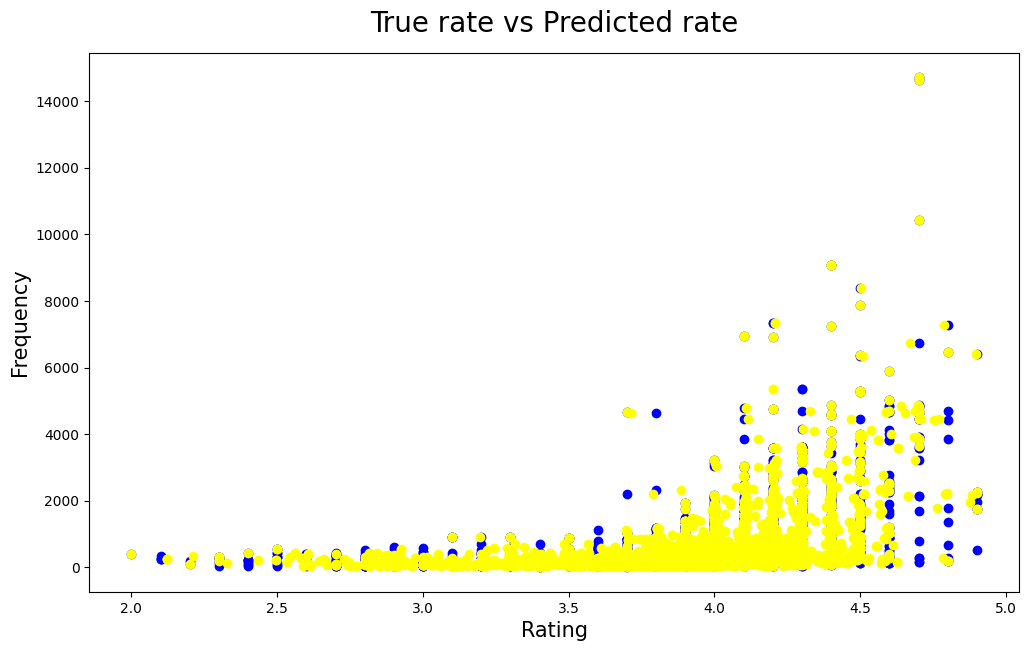

In [ ]:
plt.figure(figsize=(12,7))
preds_rf = rfr.predict(X_test)
plt.scatter(y_test,X_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,X_test.iloc[:,2],color="yellow")